In [1]:
 !pip install scikit-learn==1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Crop_recommendation.csv', delimiter = ',')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


observamos que son 8 variables, 7 cuantitativas y 1 cualitativa, ninguna presenta valores nulos

In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
print(data['label'].unique())
print(data['label'].count())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
2200


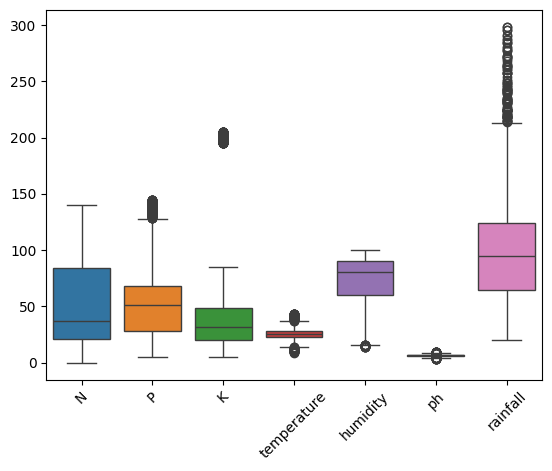

In [7]:
#Distribución de variables
sns.boxplot(data = data)
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 0, 'Temperatura')

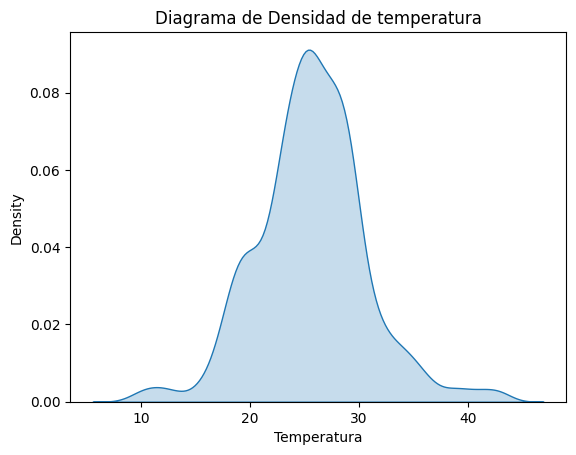

In [8]:
sns.kdeplot(data=data['temperature'], fill=True)
plt.title('Diagrama de Densidad de temperatura')
plt.xlabel('Temperatura')

Text(0.5, 0, 'ph')

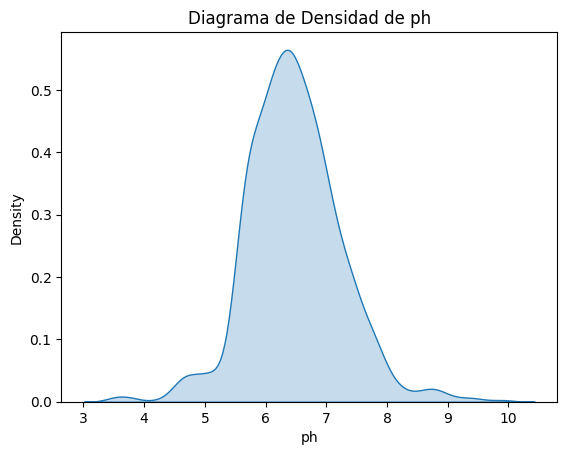

In [9]:
sns.kdeplot(data=data['ph'], fill=True)
plt.title('Diagrama de Densidad de ph')
plt.xlabel('ph')

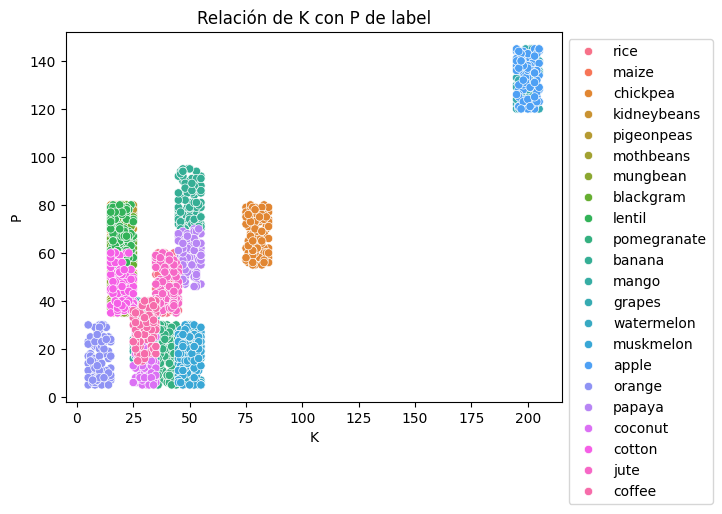

In [10]:
sns.scatterplot(x='K', y='P', hue='label', data=data)
plt.xlabel('K')
plt.ylabel('P')
plt.title('Relación de K con P de label')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Matriz de correlación

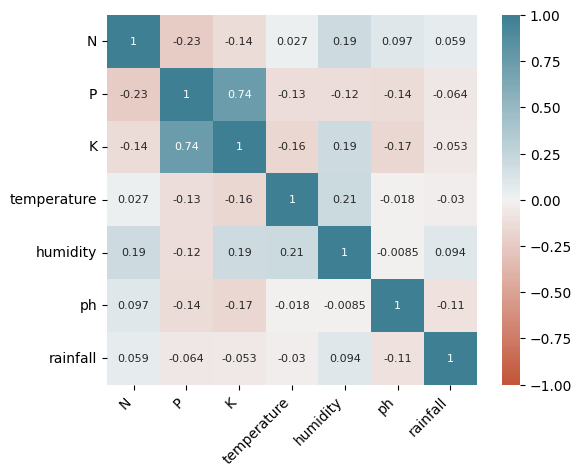

In [11]:
# Eliminamos la variable cualitativa y realizamos la matriz de correlación con todas las variables cuantitativas
corr = data.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

K y P tienen una correlacion alta

# Estandarización

In [12]:
# Utilizamos el método Z score con la librería StandardScaler porque en su fórmula tiene en cuenta la varianza,
# ya que notamos que algunas de nuestras variables tienen una varianza muy alta
df_sub = data.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

In [70]:
df_sub = data.drop(['label'], axis=1)
media = df_sub.mean()
desviacion_estandar = df_sub.std()

df_std = (df_sub - media) / desviacion_estandar

# PCA

PCA se encarga de encontrar los componentes principales de un conjunto de datos. Estos componentes principales van a ser las direcciones en las cuales la varianza de los elementos es maxima, o sea, las direcciones en donde los elementos estan mas separados los unos de los otros.
Los comp ppales son todos ortogonales entre si.

* PCA tiene como max n-1 componentes principales que son ortogonales entre si
* cada componente principal es combinacion lineal de todas las variables que dan origen al dataset
* el objetivo es maximizar la varianza

In [14]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0)
pca_features = pca.fit_transform(df_std)

# PCA dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'])
pca_df['label'] = data['label']

pca_df
# Este df contiene la proyeccion de cada registro en cada una de las nuevas variables.

,P1,P2,P3,P4,P5,P6,P7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


In [15]:
pca

PCA(n_components=7, random_state=0)

### Eigenvenctores

In [16]:
# Valores de los coeficientes de cada una de las nuevas variables
# Son 7 porque los n_components de pca son 7
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
N,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
P,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
K,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
temperature,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
humidity,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
ph,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
rainfall,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Seleccionamos el numero de componentes principales

In [17]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [18]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


Como podemos observar, los eigenvalores > 1 son los componentes 1 a 4

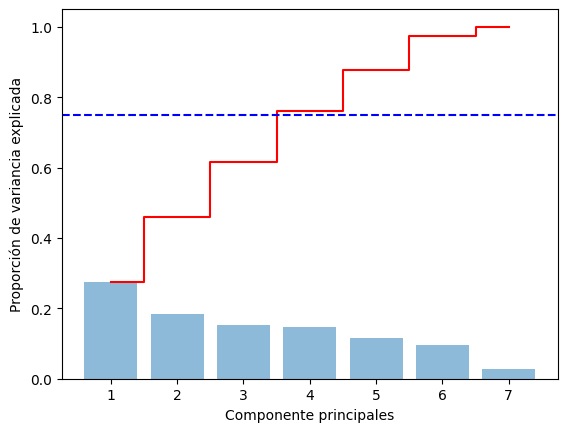

In [19]:
# Vemos graficamente la varianza acumulada

plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')

# Calcular el punto donde se acumula el 75% de la varianza explicada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_67_percent = np.argmax(cumulative_variance >= 0.75) + 1
plt.axhline(y=0.75, color='blue', linestyle='--', label='75% de varianza explicada')

plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Los componentes que acumulan el 75% (como muestra la linea punteada), alcanzan a los componentes 1 a 4


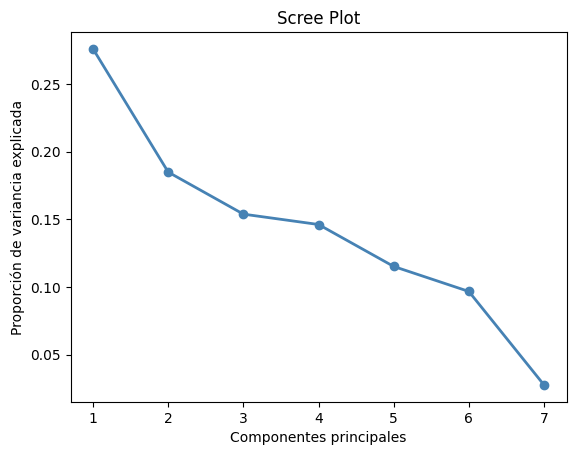

In [20]:
# Grafico de codo

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

En este gráfico no podemos observar un cambio muy brusco, ni una estabilización de la curva, así que decidimos descartar este criterio

**Criterios de selección:**

* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Como los criterios de proporcion de varianza y de Kaiser coinciden, consideramos óptimo tomar los primeros 4 componentes

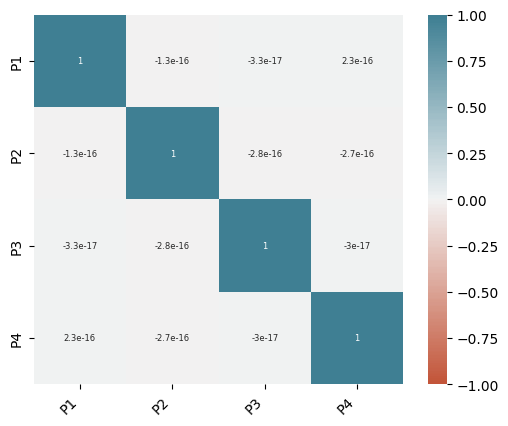

In [21]:
# Graficamos la matriz de correlación con los valores PCA seleccionados
# Para verificar que no hayan sido seleccionados erroneamente. las variables tienen que tener una correlacion lineal muy baja

corr = pca_df[['P1', 'P2', 'P3', 'P4']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Para graficar la distribución de los datos vamos a elegir los primeros 3 componentes (en lugar de los 4 que seleccionamos para nuestro modelo), para que sea un gráfico comprensible a la vista humana

In [92]:
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

#ISOMAP


Isomap busca reducir la dimension, manteniendo las distacias geodesicas.
Comienza estimando las distancias entre los puntos utilizando las distancias más cercanas en el grafo (basandose en las distancia euclideanas), y guarda en un grafo ponderado los pesos que son las distancia geodesicas. Y por ultimo lo recorre para calcular el camino minimo.


**Distancia geodésica:** distancia de mínima longitud que une dos puntos en una superficie dada

In [23]:
from sklearn.manifold import Isomap

In [24]:
isomap_df = Isomap(n_neighbors=20, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=data['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

# El parametro de n_neighbors lo seteamos probando, hasta que consideramos que nuestro grafico tenia una forma "linda"

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# T-sne

T-sne sirve para la explotacion de datos y la visualizacion de los datos en alta dimension.

Este algoritmo calcula la medida de similitud entre pares de instancias en el espacio de alta dimension y en el espacio de baja dimension, y luego trata de optimizar estas dos medidas de similitud.

t-SNE es especialmente adecuado
para captar relaciones y patrones complejos en los datos. Para ello, utiliza una distribución de probabilidad para
calcular la similitud entre los puntos de datos en las dimensiones originales y en el espacio de baja dimensión

In [25]:
from sklearn.manifold import TSNE

In [26]:
# Probamos con distintos parametros
# Perplejidad define el tamaño del circulo
tsne = TSNE(n_components=3, random_state=0, perplexity=15, n_iter=500)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=data['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

# K-Means

El algoritmo k-means divide los datos en k grupos o clusters, donde cada punto pertenece al cluster cuya distancia es menor.
El agrupamiento se realiza minimizando la suma de distancias cuadradas entre cada objeto y el centroide de su grupo

Creamos el diagrama de codo

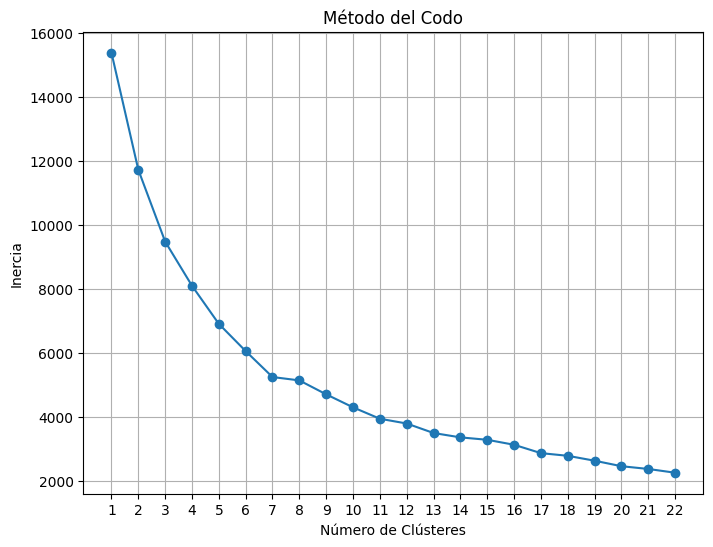

In [27]:
inercia = []
for k in range(1, 23):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 23), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 23))
plt.grid(True)
plt.show()

En base al grafico del codo vamos a quedarnos con el 13 clasters

In [71]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

In [83]:
gaps = []
max_k = 7
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(df_std, k)
    #Calculo al inercia de datos aleatorios con la mismsa estrucutra que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*df_std.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)


optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 7


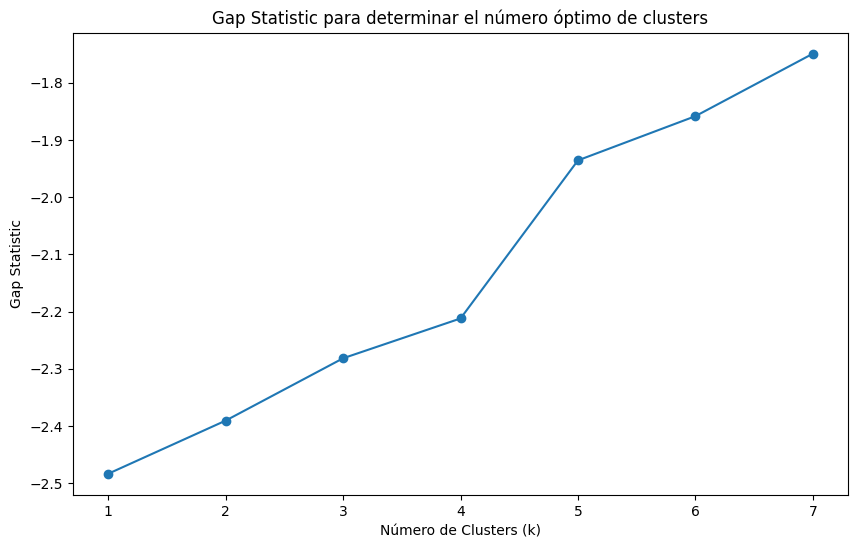

In [84]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

Creamos el modelo

In [85]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_std) #Entrenamos el modelo
# El metodo labels_ nos da a que cluster corresponde cada observacion
df_std['Cluster KMeans'] = kmeans.labels_
df_std.head(10)

,N,P,K,temperature,humidity,ph,rainfall,Cluster,Cluster KMeans
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949,0.598359,6
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548,0.598359,6
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402,0.598359,6
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471,0.598359,6
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714,0.598359,6
5,0.499716,-0.496052,-0.121409,-0.505198,0.533976,0.780390,2.685511,0.598359,6
6,0.499716,0.049636,-0.200385,-0.574161,0.501156,-0.993199,3.054333,0.598359,6
7,1.176905,-0.010996,-0.160897,-1.054259,0.512594,-0.970172,2.520280,0.598359,6
8,1.041467,0.019320,-0.200385,-0.217302,0.541391,0.278920,2.310522,0.598359,6
9,0.472628,0.140584,-0.200385,-0.472431,0.518844,-0.172141,2.142449,0.598359,6


Interpretaciones

In [86]:
df_std.groupby('Cluster KMeans').mean()

,N,P,K,temperature,humidity,ph,rainfall,Cluster
Cluster KMeans,,,,,,,,
0,-0.659247,-0.268358,-0.465841,0.188813,0.339824,0.651134,-0.475939,-1.081164
1,1.320416,0.036293,-0.357898,-0.177783,0.041447,-0.034532,-0.096135,-0.038338
2,-0.813973,-0.194668,-0.471516,0.818155,-0.922663,-1.072091,-0.062394,1.006646
3,1.335909,-1.091459,0.039506,0.298430,0.775690,-0.054511,-1.195915,1.737432
4,-0.574299,0.435222,-0.009586,-1.195559,-2.266450,0.039284,-0.100773,0.820574
5,-0.773670,2.425652,2.998166,-0.469215,0.701700,-0.635297,-0.224358,-0.920406
6,0.351451,-0.436222,-0.215637,0.125049,0.517740,0.007475,1.704344,0.232730


In [87]:
# caracteristicas normalizadas que tendria el centroide de ese cluster.
kmeans.cluster_centers_

array([[-0.65924723, -0.2683578 , -0.46584137,  0.18881289,  0.33982374,
         0.65113357, -0.47593923, -1.08116448],
       [ 1.32041583,  0.03629314, -0.35789827, -0.17778252,  0.04144675,
        -0.03453195, -0.09613538, -0.03833784],
       [-0.81397336, -0.19466827, -0.47151598,  0.81815487, -0.92266338,
        -1.07209123, -0.06239403,  1.00664565],
       [ 1.33590855, -1.09145866,  0.03950624,  0.29842963,  0.7756897 ,
        -0.05451109, -1.19591516,  1.7374318 ],
       [-0.574299  ,  0.43522154, -0.00958571, -1.19555859, -2.26645012,
         0.0392843 , -0.10077283,  0.82057411],
       [-0.77366958,  2.42565201,  2.99816611, -0.46921466,  0.70170042,
        -0.63529696, -0.22435795, -0.92040566],
       [ 0.35145108, -0.43622244, -0.2156372 ,  0.12504948,  0.51774023,
         0.00747516,  1.70434448,  0.23273017]])

<Axes: >

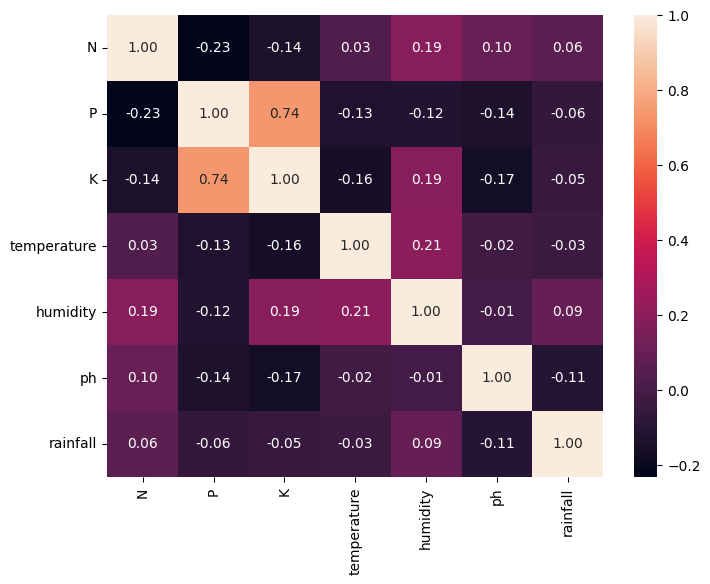

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_std[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr(),annot=True, fmt=".2f")

Para graficar, vamos a tomar P (fosforo), K (potasio), N (nitrogeno) ya que son las que mas correlacion tienen entre si.

In [91]:
fig = px.scatter_3d(df_std, x='P', y='N', z='K',
              color=df_std["Cluster KMeans"],  labels={'color': 'Cluster KMeans'})
fig.show()

# Clustering Jerarquico

Este metodo parte de todos los datos por separado, es decir, cada dato tiene su cluster y los va agrupando segun la distancia entre ellos hasta llegar a un solo grupo

In [36]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

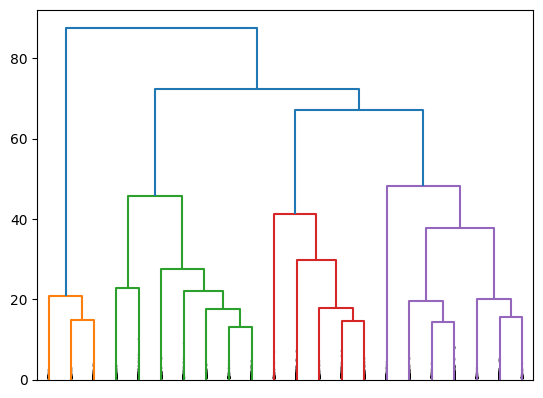

In [77]:
Z = linkage(df_std, "ward")
dendrogram(Z,  truncate_mode = 'lastp', p = 22, show_leaf_counts = False, show_contracted = True)
plt.show()

In [89]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 23):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(df_std)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(df_std, df_std, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()
    distancias.append(distancia_total)

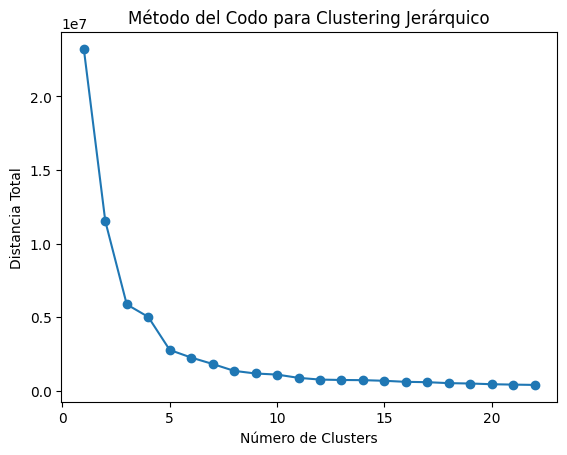

In [90]:
plt.plot(range(1, 23), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

**Gap statistic** se usa para estimar el numero de clusters comparando la curva del logaritmo
de la dispersión intracluster obtenida a partir de los datos, con el valor correspondiente
esperado bajo una distribución uniforme generada sobre el rectángulo que contiene a los
datos.

In [ ]:
!pip install gap-stat

In [61]:
from gap_statistic import OptimalK

In [80]:
gs_obj = OptimalK(n_jobs=1, n_iter=20)
n_clusters = gs_obj(df_std.astype('float'), n_refs=60,
cluster_array=np.arange(2, 10))
print('Estimated number of clusters: ', n_clusters)


Estimated number of clusters:  9


**Coeficiente de Silhouette**


El coeficiente Silhouette, es una métrica que se utiliza para
calcular la bondad de una técnica de agrupación. Su valor oscila entre -1 y 1.
* 1: Significa que los grupos están bien separados unos de otros y claramente distinguidos.
* 0: Significa que los clusters son indiferentes, o podemos decir que la distancia entre
clusters no es significativa.
* -1: significa que los grupos están asignados de forma incorrecta.

In [44]:
from sklearn.metrics import silhouette_score,silhouette_samples

elegimos 9 clusters como indica gap statistic

In [81]:
n_clusters = 9
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(df_std)

data['Cluster'] = cluster_assignments

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3


In [82]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(df_std, cluster_assignments)
silhouette_avg

0.3885267869090508

Como conclusion general, no podemos decir exactamente cual es el numero optimo de cluster, pero si podemos decir que está entre 5 y 13  